In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

In [3]:
img=cv2.imread("C:\\Users\\ankit\\Downloads\\1200px-Road_in_Norway.jpg")
resized=cv2.resize(img,(720,720),interpolation=cv2.INTER_CUBIC)
gray=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,50,600,apertureSize=3)
lines=cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=5)
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(resized,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imshow("image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

<function matplotlib.pyplot.show(close=None, block=None)>

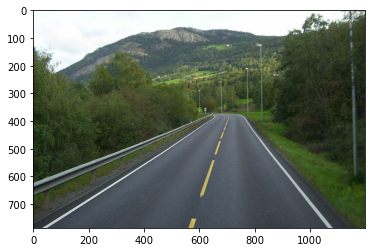

In [22]:
im=cv2.imread("C:\\Users\\ankit\\Downloads\\1200px-Road_in_Norway.jpg")
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show

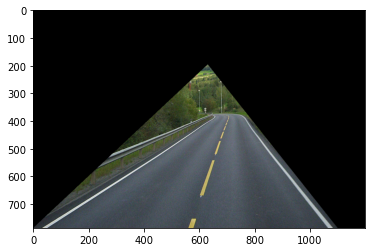

In [60]:
height=im.shape[0]
width=im.shape[1]
region=[(0,height),(width/1.9,height/4),(1100,height)]
def region_interest(img,vertices):
    mask=np.zeros_like(im)
    channel_count=im.shape[2]
    match_mask_color=(255,)*channel_count
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_img=cv2.bitwise_and(im,mask)
    return masked_img
crop_img=region_interest(im,np.array([region],np.int32),)
plt.imshow(crop_img)
plt.show()

In [53]:
def draw_line(img,lines):
    img=np.copy(img)
    blank_img=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_img,(x1,y1),(x2,y2),(0,0,255),2)
    img=cv2.addWeighted(img,0.8,blank_img,1,0.0)
    return img

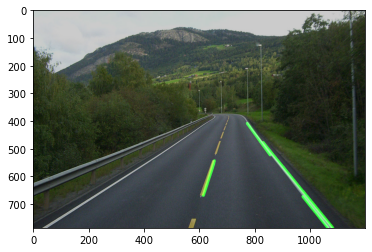

In [58]:
def region_interest(img,vertices):
    mask=np.zeros_like(img)
    #channel_count=img.shape[2]
    match_mask_color=255
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_img=cv2.bitwise_and(img,mask)
    return masked_img
def draw_line(img,lines):
    img=np.copy(img)
    blank_img=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_img,(x1,y1),(x2,y2),(0,255,0),10)
    img=cv2.addWeighted(img,0.8,blank_img,1,0.0)
    return img
img=cv2.imread("C:\\Users\\ankit\\Downloads\\1200px-Road_in_Norway.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
height=img.shape[0]
width=img.shape[1]
region=[(400,height),(width/1.9,height/8),(width,height)]
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,50,450,apertureSize=3)
crop_img=region_interest(edges,np.array([region],np.int32),)
lines=cv2.HoughLinesP(crop_img,3,np.pi/60,100,lines=np.array([]),minLineLength=100,maxLineGap=5)
img__line=draw_line(img,lines)
plt.imshow(img__line)
plt.show()

In [20]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img
def process(image):
    print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [(0,height),(width/1.72,height/1.33),(width,height)]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 50, 500)
    cropped_image = region_of_interest(canny_image,np.array([region_of_interest_vertices], np.int32),)
    lines = cv2.HoughLinesP(cropped_image,3,np.pi/60,threshold=100,lines=np.array([]),minLineLength=20,maxLineGap=100)
    image_with_lines=drow_the_lines(image, lines)
    return image_with_lines



In [21]:
cap = cv2.VideoCapture("C:\\Users\\ankit\\Downloads\\lane.mp4")

while cap.isOpened():
    ret,frame = cap.read()
    frames=process(frame)
    cv2.imshow('frame',frames)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()